Lab 04

4.1

100%|██████████| 3203/3203 [00:04<00:00, 710.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0

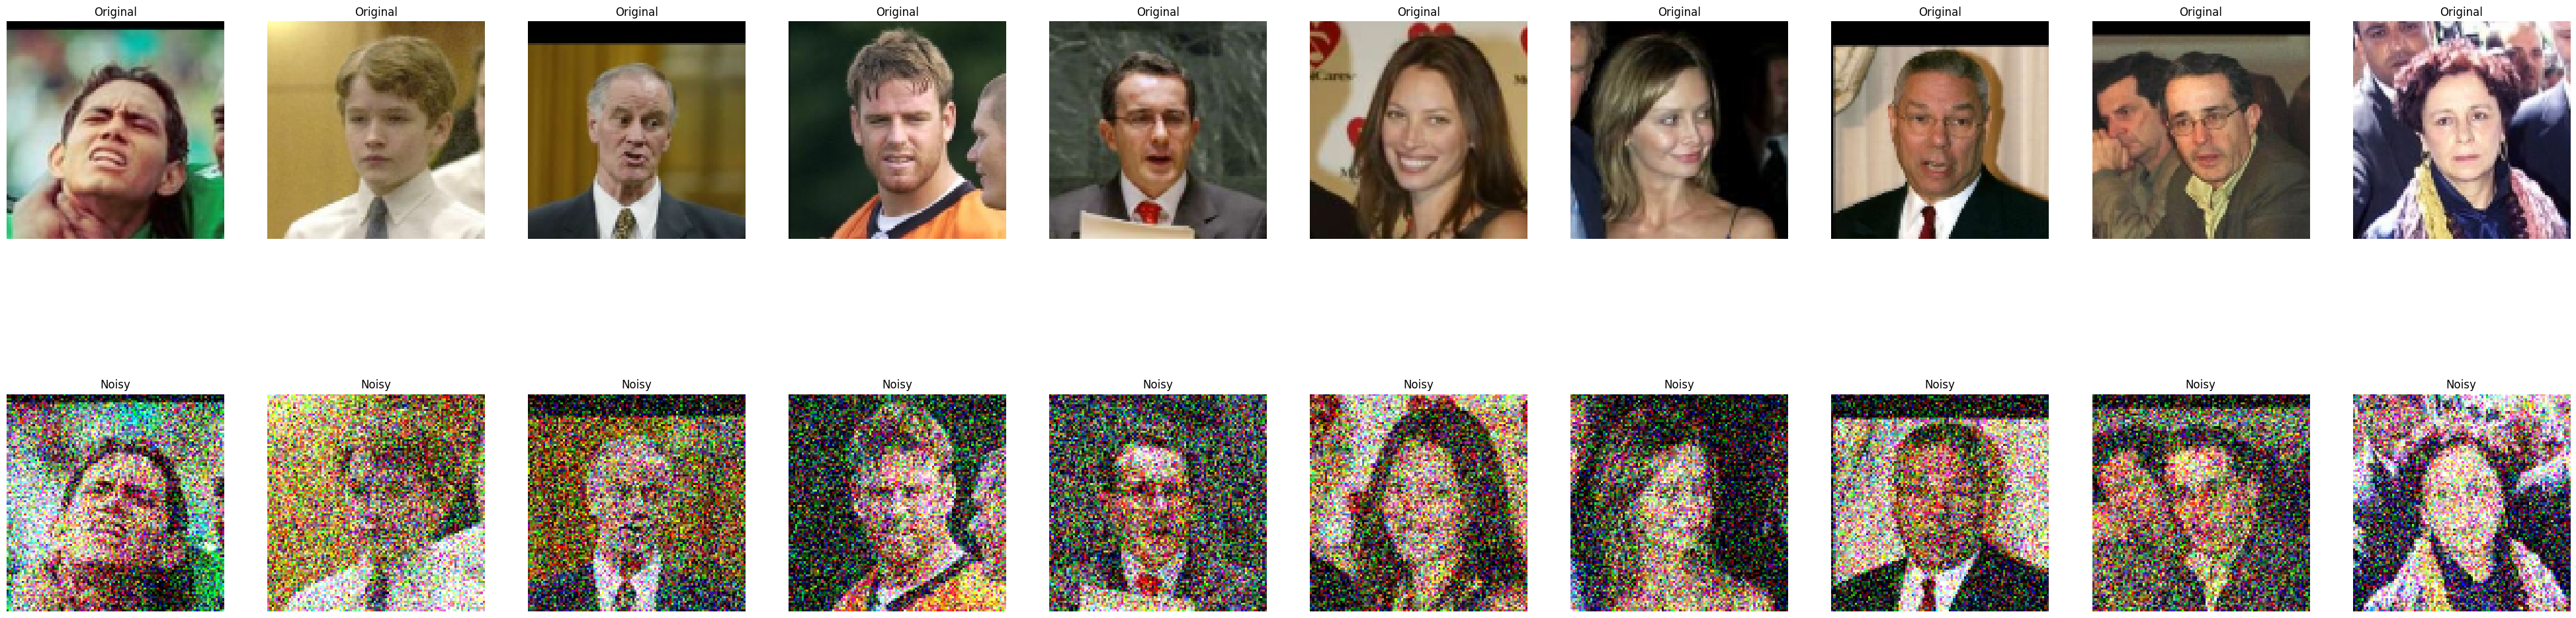

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import Model, Input
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import glob
from tqdm import tqdm
import warnings
# warnings.filterwarnings('ignore')

# Set GPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Suppress warnings
warnings.filterwarnings('ignore')

# 1. อ่านไฟล์ภาพทั้งหมดเก็บในรูป array (จำนวนภาพไม่น้อยกว่า 100 ภาพ)

image_files = glob.glob("./Lab4/face_mini/*/*.jpg")  # แทน path_to_images ด้วยที่ตั้งของไฟล์ภาพ
imgs = []

# 3. Append images to an array
for fname in tqdm(image_files):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # แปลงสีจาก BGR เป็น RGB
    img = cv2.resize(img, (100, 100))  # Resize ภาพเป็น (100, 100)
    img = np.array(img)
    imgs.append(img)

# 2. Normalized ภาพ (เพื่อให้ค่า pixel intensity = [0, 1])

imgs = np.array(imgs) / 255.0



# 4. แบ่งชุดข้อมูลเป็น Training_data, Testing_data (70 : 30)

random_state = 42  # กำหนด random state ตามที่คุณต้องการ
train_x, test_x = train_test_split(imgs, random_state=random_state, test_size=0.3)

# 5. แบ่งชุดข้อมูล Training_data เป็น Training_data, Validation_data (80:20)

train_x, val_x = train_test_split(train_x, random_state=random_state, test_size=0.2)

# 6. กำหนด noise parameters

noise_mean = 0
noise_std = 0.5  # ปรับค่าตามที่คุณต้องการ
noise_factor = 0.6  # ปรับค่าตามที่คุณต้องการ

# 7. สร้าง noise และเพิ่มเข้าในภาพ train_x, val_x, test_x

train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape))
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=val_x.shape))
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=test_x.shape))

# 8. แสดงภาพเปรียบเทียบ ภาพที่เพิ่ม noise และภาพต้นฉบับ

plt.figure(figsize=(50, 50))

# # แสดงภาพต้นฉบับ
# plt.subplot(1, 2, 1)
# plt.title("Original Image")
# plt.imshow(train_x[0])  # เลือกภาพต้นฉบับจากชุด Training_data
# plt.axis('off')

# # แสดงภาพที่เพิ่ม noise
# plt.subplot(1, 2, 2)
# plt.title("Noisy Image")
# plt.imshow(train_x_noise[0])  # เลือกภาพที่มีเสียงจากชุด Training_data
# plt.axis('off')
# plt.show()

n = 10
for i in range(n):
    # Display original images
    ax = plt.subplot(7, n, i + 1)
    plt.imshow(train_x[i])
    plt.title("Original")
    plt.axis('off')

    # Display noisy images
    ax = plt.subplot(7, n, i + 1 + n)
    plt.imshow(train_x_noise[i])
    plt.title("Noisy")
    plt.axis('off')

plt.show()



4.2

100%|██████████| 3203/3203 [00:03<00:00, 878.73it/s] 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 256)     7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                             

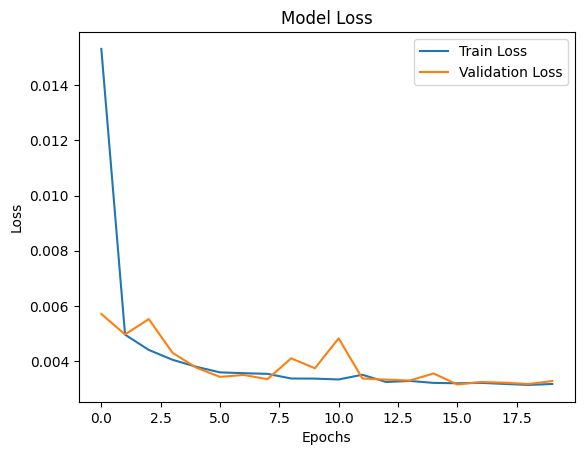

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import Model, Input
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import glob
from tqdm import tqdm
# from keras.preprocessing.image import img_to_array

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

#GPU 
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  
# 1. อ่านไฟล์ภาพทั้งหมดเก็บในรูป array (จำนวนภาพไม่น้อยกว่า 100 ภาพ)

image_files = glob.glob("./Lab4/face_mini/**/*.jpg",recursive=True)  # แทน path_to_images ด้วยที่ตั้งของไฟล์ภาพ
imgs = []

# 3. Append images to an array
for fname in tqdm(image_files):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # แปลงสีจาก BGR เป็น RGB
    img = cv2.resize(img, (100, 100))  # Resize ภาพเป็น (100, 100)
    img = np.array(img)
    imgs.append(img)

# 2. Normalized ภาพ (เพื่อให้ค่า pixel intensity = [0, 1])

imgs = np.array(imgs) / 255.0

# 4. แบ่งชุดข้อมูลเป็น Training_data, Testing_data (70 : 30)

random_state = 42  # กำหนด random state ตามที่คุณต้องการ
train_x, test_x = train_test_split(imgs, random_state=random_state, test_size=0.3)

# 5. แบ่งชุดข้อมูล Training_data เป็น Training_data, Validation_data (80:20)

train_x, val_x = train_test_split(train_x, random_state=random_state, test_size=0.2)

# 6. กำหนด noise parameters

noise_mean = 0
noise_std = 0.5  # ปรับค่าตามที่คุณต้องการ
noise_factor = 0.6  # ปรับค่าตามที่คุณต้องการ

# 7. สร้าง noise และเพิ่มเข้าในภาพ train_x, val_x, test_x

train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape))
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=val_x.shape))
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=test_x.shape))

# กำหนด Object แต่ละเลเยอร์ของ Encoder Architecture

Input_img = Input(shape=(100, 100, 3))

# Encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)

# Layer#2
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)

# Layer#3
x3 = MaxPooling2D((2, 2), strides=(2, 2))(x2)

# Layer#4
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)

# Layer#5
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)

# Layer#6
x5 = UpSampling2D((2, 2))(x4)

# Layer#4
x6 = Conv2D(128, (3, 3), activation='relu', padding='same')(x5)

# Layer#8
x7 = Conv2D(256, (3, 3), activation='relu', padding='same')(x6)

# Layer#9
decoded_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x7)

# เลือกจะทำอะไรต่อในส่วนของ Decoder Architecture ตามต้องการ
autoencoder = Model(Input_img, decoded_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

callback = EarlyStopping(monitor= 'loss', patience=3)
history = autoencoder.fit(train_x_noise, train_x,
    epochs=20,
    batch_size=16,
    shuffle=True,
    validation_data=(val_x_noise, val_x),
    callbacks=[callback],
    verbose=1)

# Plot the training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


predictions_test = autoencoder.predict(test_x_noise)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

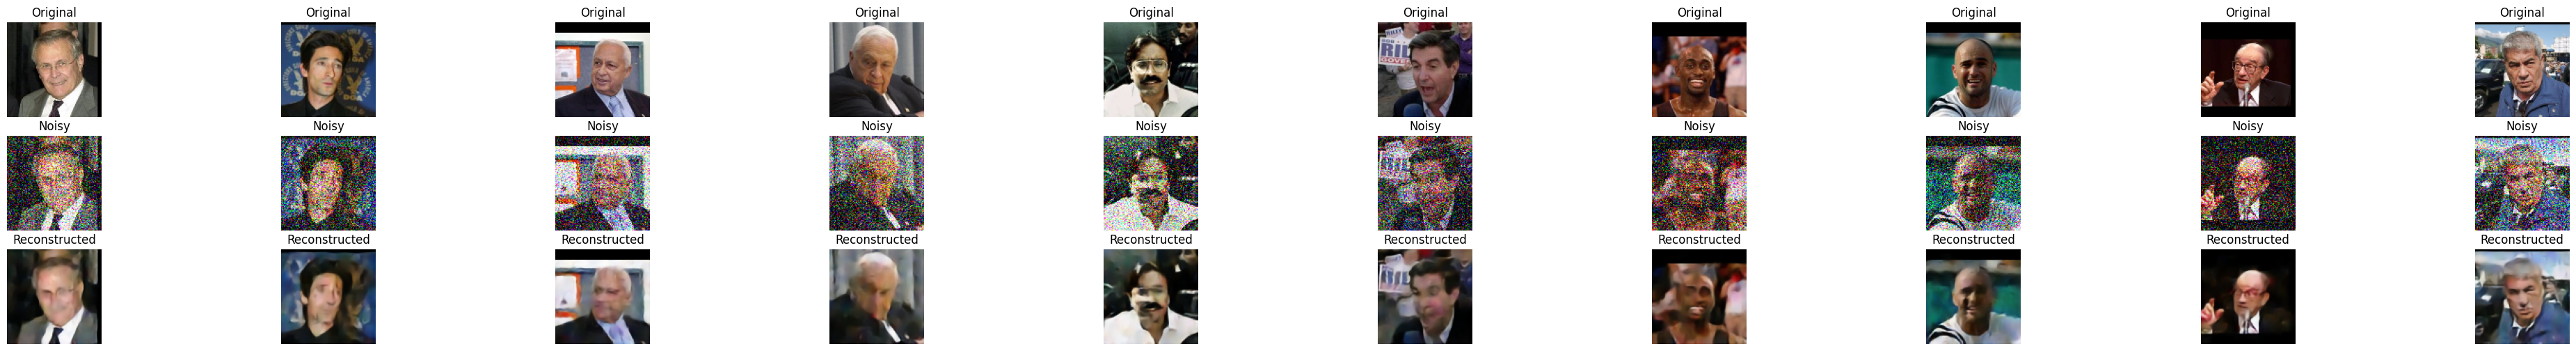

In [11]:
n = 10
plt.figure(figsize=(50, 6))

for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_x[i])
    plt.title("Original")
    plt.axis('off')

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(test_x_noise[i])
    plt.title("Noisy")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title("Reconstructed")
    plt.axis('off')
    
plt.show()

4.3

In [1]:
import cv2
import numpy as np
from keras import Model, Input
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import glob
from tqdm import tqdm
import warnings
import tensorflow as tf

# Ignore warnings
warnings.filterwarnings('ignore')

# Set CPU/GPU device
devices = tf.config.experimental.list_physical_devices('GPU')
if devices:
    device = "/GPU:0"  # You can change this to "/GPU:1", "/GPU:2", etc. to select a specific GPU
else:
    device = "/CPU:0"

strategy = tf.distribute.OneDeviceStrategy(device=device)

# Disable eager execution
tf.compat.v1.disable_eager_execution()

# Step 1: Read and preprocess image data
image_files = glob.glob("./Lab4/face_mini/**/*.jpg", recursive=True)
imgs = []

for fname in tqdm(image_files):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (100, 100))
    img = np.array(img)
    imgs.append(img)

imgs = np.array(imgs) / 255.0

# Step 2: Split data into training, validation, and test sets
random_state = 42
train_x, test_x = train_test_split(imgs, random_state=random_state, test_size=0.3)

# Step 3: Split training data into training and validation sets
train_x, val_x = train_test_split(train_x, random_state=random_state, test_size=0.2)

# Step 4: Define noise parameters
noise_mean = 0
noise_std = 0.5
noise_factor = 0.3

# Step 5: Add noise to the data
train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape))
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=val_x.shape))
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=test_x.shape))

# Step 6: Define the function to create the autoencoder model
def create_autoencoder(optimizer='adam', learning_rate=0.001, batch_size=32, epochs=2):
    with strategy.scope():
        # Define the encoder architecture
        Input_img = Input(shape=(100, 100, 3))
        x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
        x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
        x3 = MaxPooling2D((2, 2), strides=(2, 2))(x2)
        encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
        x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
        x5 = UpSampling2D((2, 2))(x4)
        x6 = Conv2D(128, (3, 3), activation='relu', padding='same')(x5)
        x7 = Conv2D(256, (3, 3), activation='relu', padding='same')(x6)
        
        # Define the decoder architecture
        decoded_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x7)
        
        # Create the autoencoder model
        autoencoder = Model(Input_img, decoded_img)
        autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')
    
    return autoencoder

# Step 7: Define the parameter grid for hyperparameter tuning
opts = ['adam', 'sgd']
lnR = [0.001, 0.01]
bs = [16, 32]
eps = [1, 2]

param_grid = dict(optimizer=opts, learning_rate=lnR, batch_size=bs, epochs=eps)

# Step 8: Create the KerasRegressor model
model = KerasRegressor(build_fn=create_autoencoder, verbose=0)

# Step 9: Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=2, verbose=10)

# Step 10: Fit the grid search to your data
with strategy.scope():
    grid_result = grid.fit(train_x_noise, train_x)

# Step 11: Print the best parameters and score
print("Best Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

# Step 12: Get the mean and standard deviation of the scores for each parameter set
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print(f"Mean: {mean}, Std: {std}, Params: {param}")

# Step 13: Train the autoencoder with the best hyperparameters
# Use the best parameters from Grid Search
best_params = grid_result.best_params_
autoencoder = create_autoencoder(**best_params)
history = autoencoder.fit(train_x_noise, train_x, epochs=best_params['epochs'], batch_size=best_params['batch_size'],
                          shuffle=True, validation_data=(val_x_noise, val_x), verbose=1)

# Step 14: Return the best parameters
best_params


100%|██████████| 3203/3203 [00:10<00:00, 311.63it/s]


MemoryError: Unable to allocate 220. MiB for an array with shape (961, 100, 100, 3) and data type float64

In [ ]:
n = 10
plt.figure(figsize=(50, 6))

for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_x[i])
    plt.title("Original")
    plt.axis('off')

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(test_x_noise[i])
    plt.title("Noisy")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()